<a href="https://colab.research.google.com/github/kayleelopiccolo/325-Midterm/blob/main/Kaylee_LoPiccolo_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Voter Trends During COVID: An Analysis**

#The purpose of this project is to understand the correlation between voter registration and major worldwide events such as a pandemic. The goal of this project is to analyze trends involving voter registration and events such as a pandemic, and get to the root cause of the correlation.
#Question 1 (national): On a national scale, does a state being "blue" or "red" impact its voter registration rate when a national scale event occurs, such as a pandemic?
#Question 2 (state): Arizona is a state that is often called a swing state. How did COVID impact Arizona's voter registration rates, and in turn how did this impact voter turnout?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

#In order to understand what we are looking at with our data, here are the names of the variables we are going to be using:
1. **Jurisdiction**: The state of interest
2.   **Year**: The year that voters registered
3. **Month**: The month that voters registered
4. **New registered voters**: The amount of voters that registered in that month of the year

In [4]:
voters.head()

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


# All of the data we are using is full, complete with voter registration from January-May in the years 2016 and 2020. The states we are analyzing are Arizona, California, Colorado, Delaware, DC, Florida, Georgia, Illinois, Maryland, North Carolina, Texas, and Virginia.

In [5]:
voters.isnull().values.any()

False

# 'Object' simply means are data our names (state, month) and 'int64' means they are numbers (year, new voter registration)

In [6]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


# For simplicity, we are going to rename jurisdiction to NAMES and new registered voters to registered_voters

In [7]:
voters_renamed=voters.rename(columns={"Jurisdiction":"NAME", "New registered voters":"registered_voters"})
voters_renamed

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


#Some potential limitations to my dataset are the ages of voters. I think it is important to understand how many young voters are registering, and not having age in this dataset is a limitation. Another limitation is not being able to look at the COVID trends after May of 2020. This was an important chunk of the year, especially that the presidential election was in November.

###The highest amount of new voter registration was in February 2020 in California, with 238,281 registered.

In [8]:
highest_registration = voters_renamed.loc[voters_renamed['registered_voters'].idxmax()]
highest_registration

,13
NAME,California
Year,2020
Month,Feb
registered_voters,238281


###The average voter registration for any given month was 48,223.

In [9]:
average_registration = voters_renamed['registered_voters'].mean()
average_registration

48223.46226415094

###Voter registration being higher than 48,223 happened 36 times.

In [10]:
high_voters = voters_renamed[voters_renamed['registered_voters'] > average_registration]
high_voters_count = high_voters.shape[0]
high_voters_count

36

###The states not listed are the states that did not go over the average. It is important to look at Texas because it has an extremely high number.

In [11]:
above_average_count = high_voters['NAME'].value_counts()
above_average_count

,count
NAME,
Texas,8
California,7
Florida,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


###California, Texas and Florida are important states because they seem to be in the top trends for every analysis.

In [12]:
highest_overall = voters_renamed.groupby('NAME')['registered_voters'].mean().nlargest(3)
highest_overall

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


#Here we are going to put our data into plots so it is easier to look at. A trend that I notice immediately is, again, California, Texas and Florida have the highest voter registration. This could possibly be due to the large state population, or the fact that those are mostly not swing states.

<ipython-input-13-12b39afec371>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_by_state, x='registered_voters', y='NAME', palette='coolwarm')


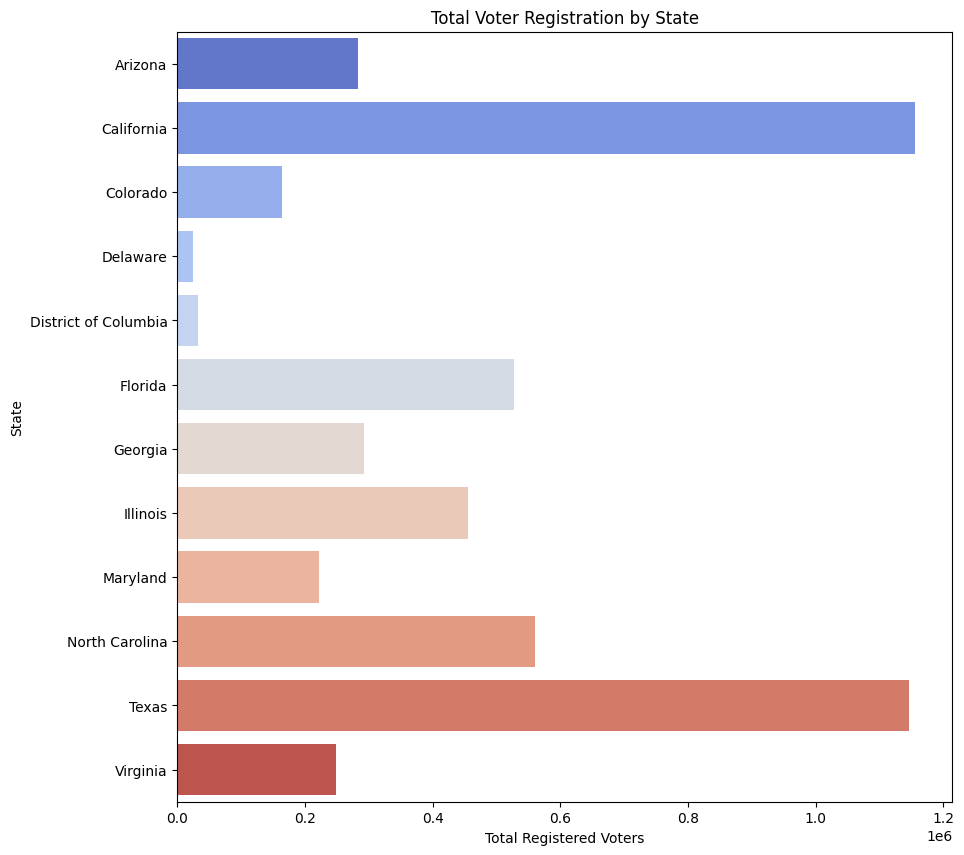

In [13]:
total_by_state = voters_renamed.groupby('NAME')['registered_voters'].sum().reset_index()
plt.figure(figsize=(10, 10))
sns.barplot(data=total_by_state, x='registered_voters', y='NAME', palette='coolwarm')
plt.xlabel('Total Registered Voters')
plt.ylabel('State')
plt.title('Total Voter Registration by State')
plt.show()

##A trend that I notice is there is a spike at the beginning of 2020, higher than 2016. This is before COVID. However, even though both 2016 and 2020 have lower registrations at the end of the first half of the year, 2020 is significantly lower.

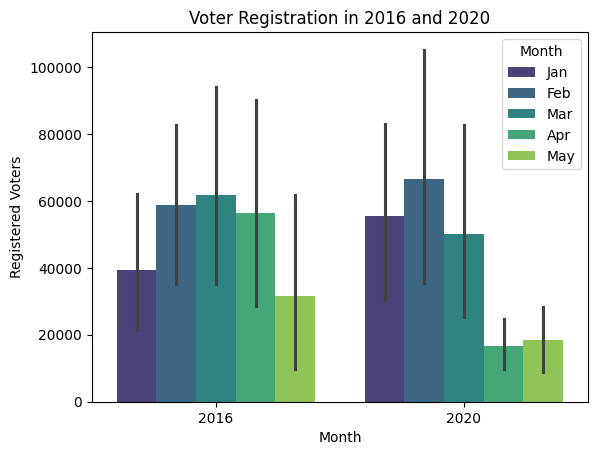

In [14]:
sns.barplot(data=voters_renamed[voters_renamed['Year'].isin([2016, 2020])],
                x='Year', y='registered_voters', hue='Month', palette='viridis')
plt.xlabel('Month')
plt.ylabel('Registered Voters')
plt.title('Voter Registration in 2016 and 2020')
plt.show()

#Here I will be answering my question about Arizona. This trend answers my question by pinpointing that although voter registration increased in the first 2 months, it dropped significantly. Upon further research, I discovered the voter turnout in 2016 in Arizona was 74.2%, and in 2020 it actually increased to 79.9%. This is interesting because it contrasts the voter registration data.
####You can find that data [here](https://azsos.gov/elections/election-information/voter-registration-statistics)

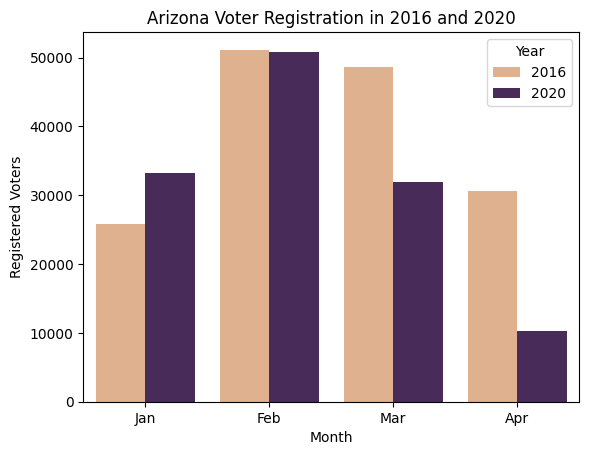

In [15]:
arizona_data = voters_renamed[(voters_renamed['NAME'] == 'Arizona') & (voters_renamed['Year'].isin([2016, 2020]))]
sns.barplot(data=arizona_data, x='Month', y='registered_voters', hue='Year', palette='flare')
plt.xlabel('Month')
plt.ylabel('Registered Voters')
plt.title('Arizona Voter Registration in 2016 and 2020')
plt.show()

#Here we are going to create a map to easily look at voter registraion trends.

In [19]:
!git clone https://github.com/SFord87/325-Datasets
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'
states = gpd.read_file(shapefile)
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
bbox = states.cx[minx:maxx, miny:maxy]

fatal: destination path '325-Datasets' already exists and is not an empty directory.


In [21]:
average_by_state = voters_renamed.groupby('NAME')['registered_voters'].mean().reset_index()
merged_with_mapping = states.set_index('NAME').join(average_by_state.set_index('NAME'), how='inner')

AttributeError: 'Series' object has no attribute 'NAME'

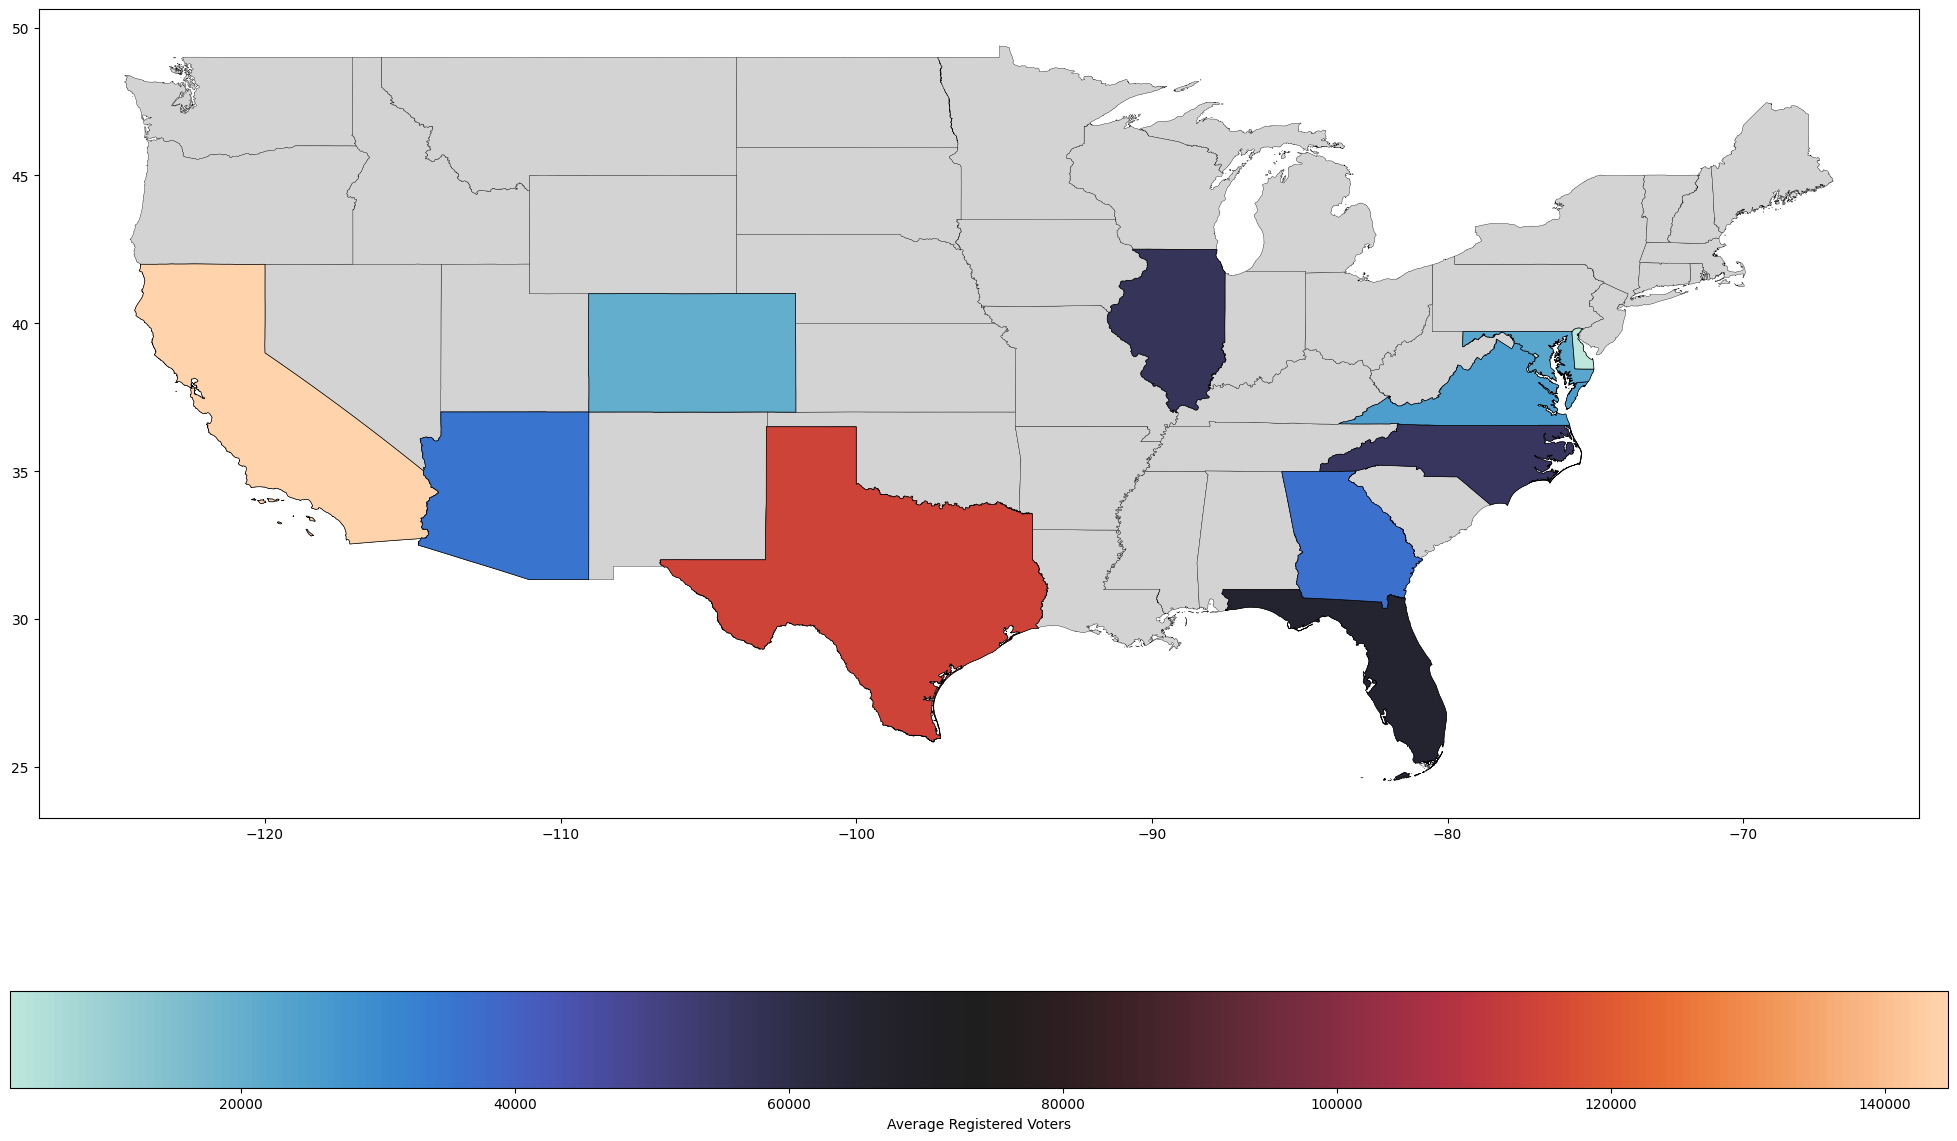

In [30]:
fig = plt.figure(figsize=(25, 15))
ax = fig.add_subplot(111)
bbox.plot(ax=ax, color="lightgray", linewidth=0.25, edgecolor="black")
merged_with_mapping.plot(column='registered_voters', ax=ax, legend=True, cmap="icefire", linewidth=0.5, edgecolor="black", legend_kwds={'label': "Average Registered Voters",
'orientation': "horizontal"})
merged_with_mapping.apply(lambda x: ax.annotate(
    text=x.NAME + "\n" + str(int(x.registered_voters)),
    xy=(x.geometry.centroid.x, x.geometry.centroid.y),
    ha="center",
    fontsize=7), axis=1)
plt.title('Average Voter Registration by State', fontsize=15)
ax.set_axis_off()
plt.show()

#In conclusion, looking at voter trends during COVID gave me an insight into how different states respond to a crisis with their voting patterns. It was noted that Florida, Texas, and California consistently had the highest voter registrations. This may be due to the fact that they are not swing states and are strong red/blue states. This helped me get to an answer of yes to my question of if being a strong red/blue state impacted voter trends.
#Any next suggestions I could offer you would be to look at swing states and the voter trends that occur there. I specifically looked at Arizona, a known swing state. It was noted that voter registration rates dropped significantly. I would offter you the idea of ways to increase voter registration in those specific states. I would tell you to not focus as much on the states that did not waver too much between 2016 and 2020.
#One next step I would take with working on this project is analyzing COVID cases while simultaneously looking at voter registration rates. I want to see if there is a specific correlation between high/low COVID cases in a particular state and how many people registered to vote there. If I had to guess, I would say that more cases led to an decrease in registration because it would make people avoid going to register, or even sending in a mail in registration.

[Here is my Github link](https://github.com/kayleelopiccolo/325-Midterm)

####Academic Integrity Statement signed: Kaylee LoPiccolo